# **Máquinas de Soporte Vectorial (SVM)**
Las ***Support Vector Machines*** o SVM son un modelo de aprendizaje supervisado que se utiliza para clasificación y regresión. Las SVM son particularmente conocidas y valoradas por su capacidad para manejar datos de alta dimensión y su eficacia en situaciones donde el número de dimensiones supera el número de muestras.

# **Hiperplanos y margenes**

Si hemos entendido bien el modelo de Regresión Lineal, sabremos que este puede ser entendido como un hiperplano de tantas dimensiones como coeficientes. Dicho hiperplano separa el espacio de datos en dos secciones. El problema de esto es que existen muchos hiperplanos posibles que realicen la misma separación de los datos. ¿Cuál opción es la óptima? Las SVMs hacen uso de los vectores de soporte para lograr la mejor partición posible. Estos vectores de soporte son los puntos

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=17hf6i_mvFPz4pzzYVIrVDnzpPuiNbNnX" width="500">

En las SVMs el metaparámetro $C$ juega un papel crucial al definir la compensación entre lograr un margen grande entre las clases y asegurar una clasificación correcta de los ejemplos de entrenamiento. Un valor bajo de
$C$ permite un margen más grande al costo de un mayor número de errores de clasificación. Esto puede ser útil cuando se prefiere un modelo más generalizado que no sea muy sensible a los datos ruidosos o a los puntos de datos atípicos. Un valor alto de $C$ implica una menor tolerancia a los errores de clasificación, forzando al modelo a clasificar todos los ejemplos de entrenamiento correctamente, lo que puede resultar en un margen más pequeño. Esto puede llevar a un modelo que se ajuste demasiado a los datos de entrenamiento, reduciendo su capacidad de generalización.

# **El truco del kernel**


La detección de relaciones no lineales en los datos es tarea imposible para algoritmos más sencillos como la Regresión Logística. Sin embargo, el llamado "truco del kernel" permite a las máquinas de soporte vectorial (SVM) esta tarera, y todo ello sin necesidad de calcular explícitamente las coordenadas de los datos en estos espacios. En última instancia el kernel es una función que permite calcular el producto interno entre dos vectores en un espacio de características transformado, sin necesitar realmente llevar los vectores a ese espacio. Esencialmente, transforma el espacio de características de tal manera que los datos que no son separables linealmente en el espacio original puedan serlo en este nuevo espacio.

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=18O5Y1hPrG85iC9_vfV94rWQY_Kcl49mI" width="700">

<div style="display: flex; justify-content: center;">
<img src="https://drive.google.com/uc?export=view&id=1OUgiTO4KrCdkNDTYDPO2Nk24M_o9I5rC" width="400">

Hay varios tipos de funciones kernel, cada uno diseñado para distintos tipos de problemas y distribuciones de datos:

- **Lineal**: este es el kernel más simple y no implica ninguna transformación no lineal de los datos. El producto interno entre dos vectores $x$ e $y$ y es simplemente la suma de los productos de sus correspondientes elementos. Es efectivo cuando los datos son ya linealmente separables en el espacio de características original.
- **Polinómico**: permite modelar interacciones de orden superior entre las características a través de un polinomio de grado $d$. $\gamma$ que escala el producto interno. Este kernel es particularmente potente para manejar casos donde las clases no son linealmente separables.
- **RBF o Gaussiano**: Este kernel utiliza la distancia euclidiana entre los puntos $x$ e $y$, escalada por un parámetro $\gamma$. Al igual que el kernel polinómico, este kernel es particularmente potente para manejar casos donde las clases no son linealmente separables.

# **Análsis del DataFrame**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from typing import List, Tuple, Dict
import seaborn as sns

url='https://drive.google.com/file/d/1btCzqdC5EHUdpJbICCdouOUAJQukx3mM/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)

data.head(6)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
5,1337,6,2,10,3.775635,1520,11,0.943195,1


In [ ]:
data.shape

(54035, 9)

In [ ]:
list_columns = data.columns.tolist()

num_columns = data.select_dtypes(include=["int64","float64"]).columns.tolist()
print("Columnas numéricas: ", num_columns)

cat_columns = data.select_dtypes(include=["object"]).columns.tolist()
print("Columnas categóricas: ", cat_columns)

Columnas numéricas:  ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season', 'class']
Columnas categóricas:  []


In [ ]:
target_column = "class"

pred_columns = [col for col in list_columns if col != target_column]
num_pred_columns = [col for col in list_columns if col in num_columns]
cat_pred_columns = [col for col in list_columns if col in cat_columns]
print("Columnas predictoras: ", pred_columns)
print("Columnas numéricas predictoras: ", num_pred_columns)
print("Columnas categóricas predictoras: ", cat_pred_columns)

Columnas predictoras:  ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season']
Columnas numéricas predictoras:  ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'season', 'class']
Columnas categóricas predictoras:  []


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,54035.0,567.257204,359.883763,0.000000,289.000000,525.000000,781.000000,1891.000000
cap-shape,54035.0,4.000315,2.160505,0.000000,2.000000,5.000000,6.000000,6.000000
gill-attachment,54035.0,2.142056,2.228821,0.000000,0.000000,1.000000,4.000000,6.000000
gill-color,54035.0,7.329509,3.200266,0.000000,5.000000,8.000000,10.000000,11.000000
stem-height,54035.0,0.759110,0.650969,0.000426,0.270997,0.593295,1.054858,3.835320
stem-width,54035.0,1051.081299,782.056076,0.000000,421.000000,923.000000,1523.000000,3569.000000
stem-color,54035.0,8.418062,3.262078,0.000000,6.000000,11.000000,11.000000,12.000000
season,54035.0,0.952163,0.305594,0.027372,0.888450,0.943195,0.943195,1.804273
class,54035.0,0.549181,0.497580,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
data.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

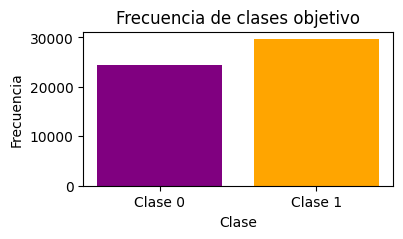

In [ ]:
class_counts = data[target_column].value_counts()
plt.figure(figsize=(4, 2))
plt.bar(class_counts.index, class_counts.values, color=['orange', 'purple'])
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de clases objetivo')
plt.xticks([0, 1], ['Clase 0', 'Clase 1'])
plt.show()

# **Support Vector Classification**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer

# CREACIÓN DEL PIPELINE CON SVMs
model = Pipeline([
    ('svm_classifier', SVC())  # Support Vector Classification o SVM para tareas de clasificación.
])

In [ ]:
# DIVISIÓN ENTRE COLUMNAS PREDICTIVAS Y OBJETIVO
# Separar colunas predictoras de columna objetivo
X = data.drop(columns=target_column)
y = data[target_column]

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

# DIVISIÓN ENTRE DATOS DE ENTRENAMIENTO Y DATOS DE TESTEO
# Seleccionamos una proporción de 80% de los datos para entrenamiento y 20% para el testeo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Tamaño datos de entrenamiento:", X_train.shape)
print("Tamaño datos de testeo:", X_test.shape)

Tamaño datos de entrenamiento: (43228, 8)
Tamaño datos de testeo: (10807, 8)


In [ ]:
# CONFIGURACIÓN DE LA BÚSQUEDA DE HIPERPARÁMETROS
# Configurar la búsqueda por validación cruzada para encontrar el mejor valor de alpha
metaparameter_list = ['svm_classifier__C', 'svm_classifier__gamma', 'svm_classifier__kernel']
param_grid = {
    metaparameter_list[0]: [50, 150, 200, 500, 1000, 1500],
    metaparameter_list[1]: ['scale', 'auto'],
    metaparameter_list[2]:['linear', 'poly', 'rbf']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, verbose = 1, scoring='f1_weighted')

In [ ]:
from scipy.stats import mode

# BÚSQUEDA DE HIPERPARÁMETROS CON VALIDACIÓN ANIDADA
n_splits = 5
outer_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
best_params_list = []
best_scores = []

# Aquí estamos haciendo una Validación Cruzada manualmente. En cada iteración (tantas como número de folds indicados) se calculará un GridSearchCV
# con el conjunto de entrenamiento seleccionado en ese fold.
for train_index, test_index in outer_cv.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_train_fold = y_train.iloc[train_index]
    y_test_fold = y_train.iloc[test_index]

    # Ejecutar GridSearchCV
    grid_search.fit(X_train_fold, y_train_fold)

    # Almacenar los mejores parámetros y los mejores resultados en cada split
    best_params_list.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

# Un bucle por fold, indicando el hiperparámetro óptimo y la mejor métrica de error de esa iteración.
for split in range(n_splits):
  for metaparameter in metaparameter_list:
    value = best_params_list[split][metaparameter]
    if isinstance(value, (int, float)):
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {round(value, 3)}')
    else:
        print(f'Mejor valor en el fold {split} del {metaparameter} en VC anidada: {value}')
  print(f"Mejor f1-Score ponderada en el fold {split}: {np.round(best_scores[split],2)}\n")

# Un bucle para los estadísticos de cada hiperparámetro
for metaparameter in metaparameter_list:
  values = [value[metaparameter] for value in best_params_list] # Recogemos los diferentes valores que nos devuelve cada fold
  if isinstance(values[0], (int, float)):
    mean = sum(values) / len(values) # Calculamos la media
    std = np.sqrt(sum((value - mean) ** 2 for value in values) / len(values)) # Calculamos la Desviación Típica
    print(f'Promedio de las puntuaciones {metaparameter} en VC anidada: {round(mean,3)}')
    print(f'Desviación Típica de las puntuaciones {metaparameter} en VC anidada: {round(std,3)}\n')
  else:
    unique_values, counts = np.unique(values, return_counts=True) # Valores y su frecuencia en values
    max_index = np.argmax(counts) # Índice del valor con mayor frecuencia
    mode = unique_values[max_index]
    count = counts[max_index]
    print(f'Moda de las puntuaciones {metaparameter} en VC anidada: {mode}')
    print(f'Frecuencia de la moda de las puntuaciones {metaparameter} en VC anidada: {count}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
# BÚSQUEDA DE HIPERPARÁMETROS SIN VALIDACIÓN ANIDADA
# Entrenamos ahora con GridSearchCV sin anidar.
grid_search.fit(X_train, y_train)

# Mostrar mejor puntuación y los mejores parámetros. Podemos compararlo a aquellos valores obtenidos en la validación cruzada anidada.
for metaparameter in metaparameter_list:
  value = grid_search.best_params_[metaparameter]
  if isinstance(value, (int, float)):
    print(f'Mejor puntuación del {metaparameter} en VC anidada: {round(grid_search.best_params_[metaparameter],3)}')
  else:
    print(f'Mejor valor del {metaparameter} en VC anidada: {value}')
print("Mejor F1-Score:", np.round(grid_search.best_score_,2))

In [ ]:
# TESTEO DEL MODELO
# Recoger el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# EVALUACIÓN DEL MODELO
accuracy = round(accuracy_score(y_test, y_pred), 2)
# Para la precisión, recall, y f1, especificamos 'weighted'. Esto es útil pues pondera las clases, permitiéndonos hacer una idea de la calidad de la clasificación para clases desbalanceadas.
precision = round(precision_score(y_test, y_pred, average='weighted'), 2)
recall = round(recall_score(y_test, y_pred, average='weighted'), 2)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Exactitud:", accuracy)
print("Precisión ponderada:", precision)
print("Sensibilidad ponderada:", recall)
print("F1 Score ponderada:", f1)
print("Matriz de Confusión:\n", conf_matrix)